In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('/Users/user/cleaned_dataset.csv')

In [4]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [5]:
# Assuming 'churn' is the target variable
X = data.drop('Churn', axis=1)
y = data['Churn']
y

0      False
1       True
2       True
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Name: Churn, Length: 667, dtype: bool

In [6]:
# Pipeline for preprocessing numerical and categorical features
numerical_transformer = StandardScaler()
numerical_features = StandardScaler()
categorical_transformer = OneHotEncoder()
categorical_features = OneHotEncoder()



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [7]:
# Define categorical and numerical features based on existing columns in the DataFrame
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [8]:
# Check if all specified features are present in the DataFrame
all_features = categorical_features + numerical_features
missing_features = [feature for feature in all_features if feature not in X.columns]

if missing_features:
    raise ValueError(f"Columns {', '.join(missing_features)} are not present in the DataFrame.")

In [9]:
# Pipeline for preprocessing numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the pipeline with preprocessing and model
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [12]:
# Step 2: Model Training
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Area code',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', RandomForestClassifier())])

In [13]:
# Step 3: Model Evaluation
lr_pred = pipeline_lr.predict(X_test)
rf_pred = pipeline_rf.predict(X_test)

In [14]:
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [15]:
lr_precision = precision_score(y_test, lr_pred, average='micro')  # Changed to micro average
rf_precision = precision_score(y_test, rf_pred, average='micro')  # Changed to micro average


In [16]:
lr_recall = recall_score(y_test, lr_pred, average='micro')  # Changed to micro average
rf_recall = recall_score(y_test, rf_pred, average='micro')  # Changed to micro average


In [17]:
lr_f1 = f1_score(y_test, lr_pred, average='micro')  # Changed to micro average
rf_f1 = f1_score(y_test, rf_pred, average='micro')  # Changed to micro average

In [18]:
# Step 4: Results and Discussion
print("Logistic Regression Test Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1 Score: {lr_f1:.4f}")

print("\nRandom Forest Classifier Test Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

Logistic Regression Test Metrics:
Accuracy: 0.9104, Precision: 0.9104, Recall: 0.9104, F1 Score: 0.9104

Random Forest Classifier Test Metrics:
Accuracy: 0.9403, Precision: 0.9403, Recall: 0.9403, F1 Score: 0.9403


In [48]:
# Model Evaluation using mean squared error and r squared.

from sklearn.metrics import mean_squared_error, r2_score

# Predictions for Linear Regression model
y_pred_lr = pipeline_lr.predict(X_train)

# Predictions for Random Forest model
y_pred_rf = pipeline_rf.predict(X_train)

# Convert predictions to compatible types if necessary
y_pred_lr = y_pred_lr.astype(float)
y_pred_rf = y_pred_rf.astype(float)

# Mean Squared Error
mse_lr = mean_squared_error(y_train, y_pred_lr)
mse_rf = mean_squared_error(y_train, y_pred_rf)

print("Mean Squared Error for Linear Regression:", mse_lr)
print("Mean Squared Error for Random Forest:", mse_rf)

# R-squared
r2_lr = r2_score(y_train, y_pred_lr)
r2_rf = r2_score(y_train, y_pred_rf)

print("R-squared for Linear Regression:", r2_lr)
print("R-squared for Random Forest:", r2_rf)


Mean Squared Error for Linear Regression: 0.1125703564727955
Mean Squared Error for Random Forest: 0.0
R-squared for Linear Regression: 0.11754966887417218
R-squared for Random Forest: 1.0


In [26]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

#Read the dataset
data_df = pd.read_csv('/Users/user/cleaned_dataset.csv')

#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(data_df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  667
nNumber of features: 20
nData Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
nMissing values: 0
nUnique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total i

In [36]:
# Generate the bar chart
fig = px.bar(data, x='State', color='Churn', 
             title='Churn Distribution by State',
             labels={'State': 'State', 'Churn': 'Churn'},
             category_orders={'Churn': [False, True]}) # Ensure correct order of categories

fig.show()

In [49]:
#  dataset has columns 'State' and 'Churn', adjust if necessary
state_churn_rates = data.groupby('State')['Churn'].mean()

# Find state with the highest churn rate
state_highest_churn = state_churn_rates.idxmax()
highest_churn_rate = state_churn_rates.max()

# Find state with the lowest churn rate
state_lowest_churn = state_churn_rates.idxmin()
lowest_churn_rate = state_churn_rates.min()

print(f"State with the highest churn rate: {state_highest_churn}, Churn Rate: {highest_churn_rate}")
print(f"State with the lowest churn rate: {state_lowest_churn}, Churn Rate: {lowest_churn_rate}")

State with the highest churn rate: CA, Churn Rate: 0.4
State with the lowest churn rate: AK, Churn Rate: 0.0


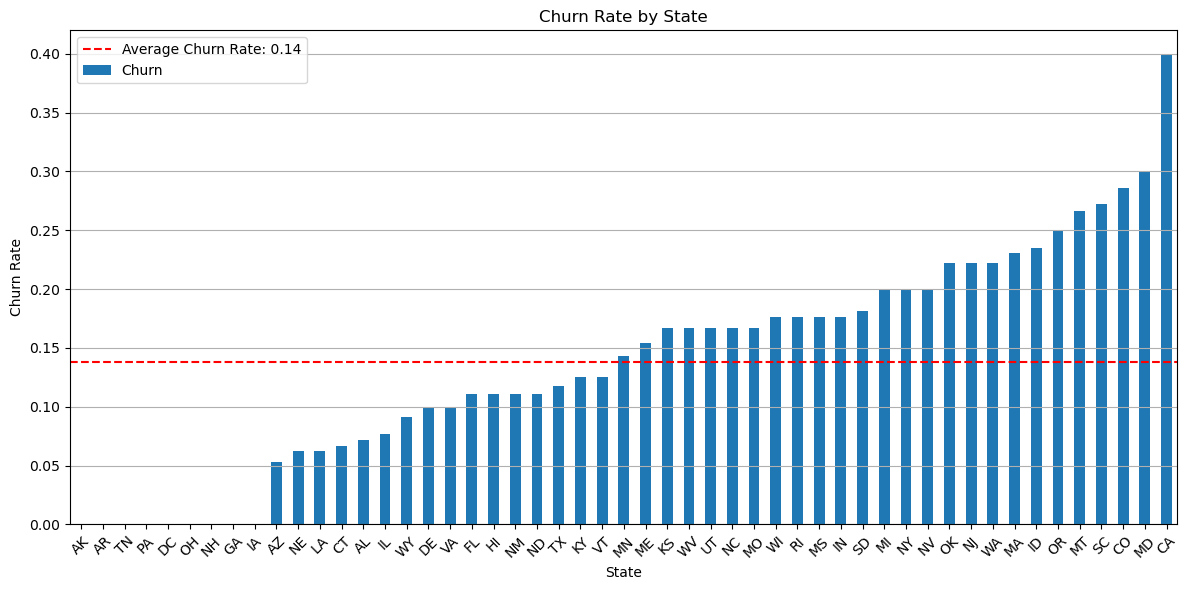

In [50]:
# dataset has columns 'State' and 'Churn', adjust if necessary
state_churn_rates = data.groupby('State')['Churn'].mean().sort_values()

# Calculate the average churn rate
average_churn_rate = state_churn_rates.mean()

# Plotting
plt.figure(figsize=(12, 6))
state_churn_rates.plot(kind='bar')
plt.axhline(y=average_churn_rate, color='r', linestyle='--', label=f'Average Churn Rate: {average_churn_rate:.2f}')
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

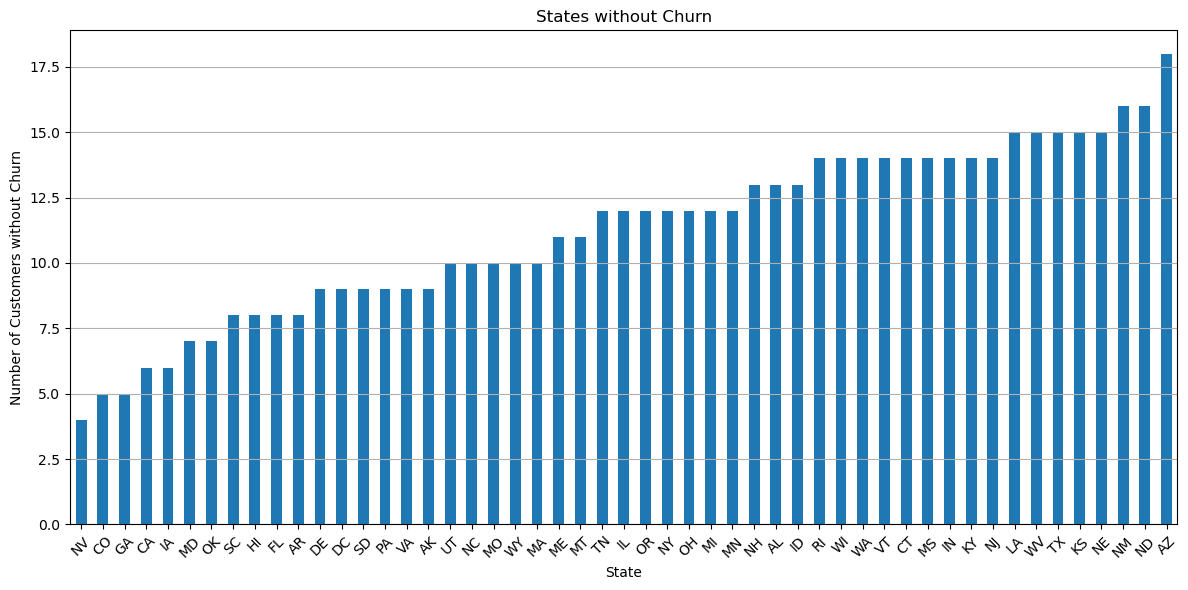

In [51]:
# Stste without Churn

# dataset has columns 'State' and 'Churn', adjust if necessary
states_without_churn = data[data['Churn'] == 0].groupby('State').size().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
states_without_churn.plot(kind='bar')
plt.title('States without Churn')
plt.xlabel('State')
plt.ylabel('Number of Customers without Churn')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

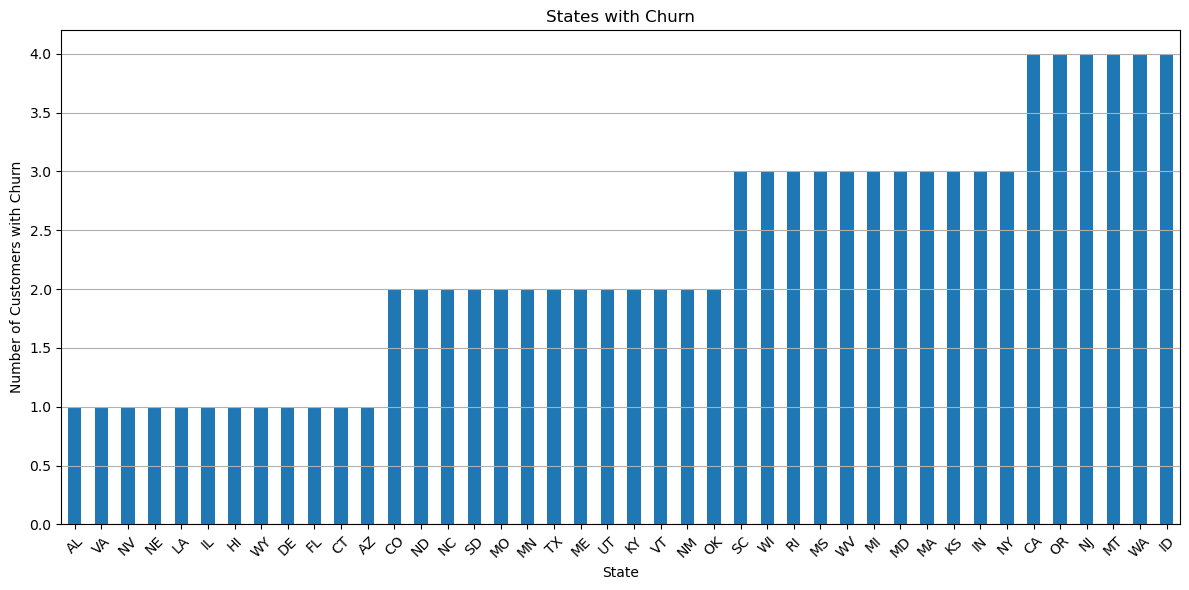

In [52]:
# dataset has columns 'State' and 'Churn', adjust if necessary
states_with_churn = data[data['Churn'] == 1].groupby('State').size().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
states_with_churn.plot(kind='bar')
plt.title('States with Churn')
plt.xlabel('State')
plt.ylabel('Number of Customers with Churn')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()